In [1]:
import numpy as np
from tensorflow import keras
from PIL import Image
import tensorflow as tf

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2022-09-06 10:06:36.047951: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-06 10:06:36.053877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-06 10:06:36.054088: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
input_dim = (96, 96, 3)
batch_size = 64
classes = 21
epochs = 50

In [4]:
# Create a simple CNN Model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', input_shape=input_dim))
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))         
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(21, activation='softmax'))

2022-09-06 10:06:42.206032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-06 10:06:42.206544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-06 10:06:42.206740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-06 10:06:42.206898: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so 

In [5]:
# Show architecture!
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       590080    
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 256)       590080    
                                                        

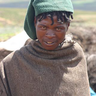

In [6]:
# Load the small dataset and shuffle order
with np.load('./train_small.npz') as f:
    X = f['X'] # Load input images
    y = f['y'] # Load Labels
    
    ind = np.arange(X.shape[0]) # Create Index
    np.random.shuffle(ind) # Shuffle Index
    X = X[ind,] # Shuffle X
    y = keras.utils.to_categorical(y[ind,]) # Shuffle X and create dummy variables
# Show first image
Image.fromarray(X[0], 'RGB')

In [7]:
# Compile the model
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'])

In [ ]:
# Train
results = model.fit(x=X, y=y, 
              batch_size=batch_size, 
              epochs=epochs, 
              validation_split=0.2, 
              shuffle=True)

Epoch 1/50


2022-09-06 10:06:54.755847: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2022-09-06 10:06:55.788948: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.60GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


119/119 [==============================] - ETA: 0s - loss: 3.5383 - categorical_accuracy: 0.0669

2022-09-06 10:07:22.539129: W tensorflow/core/kernels/conv_ops_gpu.cc:336] None of the algorithms provided by cuDNN frontend heuristics worked; trying fallback algorithms.  Conv: batch: 8
in_depths: 128
out_depths: 256
in: 48
in: 48
data_format: 1
filter: 3
filter: 3
filter: 128
dilation: 1
dilation: 1
stride: 1
stride: 1
padding: 1
padding: 1
dtype: DT_FLOAT
group_count: 1
device_identifier: "NVIDIA GeForce RTX 2060 sm_7.5 with 6222577664B RAM and 30 cores"
version: 1



119/119 [==============================] - 31s 247ms/step - loss: 3.5383 - categorical_accuracy: 0.0669 - val_loss: 2.9682 - val_categorical_accuracy: 0.0862
Epoch 2/50


2022-09-06 10:07:25.214800: W tensorflow/core/common_runtime/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


119/119 [==============================] - 29s 241ms/step - loss: 2.9527 - categorical_accuracy: 0.0837 - val_loss: 2.7791 - val_categorical_accuracy: 0.1481
Epoch 3/50
119/119 [==============================] - 29s 241ms/step - loss: 2.7801 - categorical_accuracy: 0.1429 - val_loss: 2.6721 - val_categorical_accuracy: 0.1884
Epoch 4/50
119/119 [==============================] - 29s 242ms/step - loss: 2.6971 - categorical_accuracy: 0.1644 - val_loss: 2.6201 - val_categorical_accuracy: 0.2000
Epoch 5/50
119/119 [==============================] - 29s 242ms/step - loss: 2.6236 - categorical_accuracy: 0.1769 - val_loss: 2.5484 - val_categorical_accuracy: 0.2164
Epoch 6/50
119/119 [==============================] - 29s 242ms/step - loss: 2.5536 - categorical_accuracy: 0.2021 - val_loss: 2.5295 - val_categorical_accuracy: 0.1989
Epoch 7/50
119/119 [==============================] - 29s 242ms/step - loss: 2.4947 - categorical_accuracy: 0.2200 - val_loss: 2.4643 - val_categorical_accuracy: 0.24

In [ ]:
# Save model
model.save('./my_model')

In [ ]:
# Diese Zelle muss von mir ausgeführt werden können!
# Es müssen mindestens loss und categorical_accuracy angezeigt werden

model = keras.models.load_model('./my_model')
with np.load('./test.npz') as f:
    X_test = f['X']
    y_test = keras.utils.to_categorical(f['y'])
results = model.evaluate(X_test, y_test, batch_size=32)